# Exercises II

## 1)  Acquire bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips from the zillow database for all 'Single Family Residential' properties.

In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import env
from pydataset import data
import scipy
import os
from sklearn.model_selection import train_test_split
# turn off pink boxes for demo
# from sklearn.tree import DecisionTreeClassifier, plot_tree
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

***

### Please refer to wrangle folder for code and details on which datasets and data columns were pulled from original dataset  [Wrangle.py(GitHub)](https://github.com/EribertoContreras/regression-exercises/blob/main/wrangle.py)__

***

In [2]:
from wrangle import get_zillow_data

In [3]:
df = get_zillow_data()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152864 entries, 0 to 2152863
Data columns (total 8 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   parcelid                      int64  
 1   bedroomcnt                    float64
 2   bathroomcnt                   float64
 3   calculatedfinishedsquarefeet  float64
 4   taxvaluedollarcnt             float64
 5   yearbuilt                     float64
 6   taxamount                     float64
 7   fips                          float64
dtypes: float64(7), int64(1)
memory usage: 131.4 MB


***

### Initially started 2,152,864  entries, now it is time to look further into the data and see if there are any values that we can drop such as null values, duplicates and zero values.

****

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
parcelid,2152864.0,1.309657e+07,5.171556e+06,10711725.00,1.165907e+07,1.259851e+07,1.405609e+07,1.696019e+08
bedroomcnt,2152853.0,3.287195e+00,9.547568e-01,0.00,3.000000e+00,3.000000e+00,4.000000e+00,2.500000e+01
bathroomcnt,2152853.0,2.230687e+00,9.992805e-01,0.00,2.000000e+00,2.000000e+00,3.000000e+00,3.200000e+01
calculatedfinishedsquarefeet,2144379.0,1.862855e+03,1.222125e+03,1.00,1.257000e+03,1.623000e+03,2.208000e+03,9.525760e+05
taxvaluedollarcnt,2152371.0,4.618961e+05,6.996759e+05,1.00,1.881700e+05,3.276710e+05,5.345270e+05,9.842891e+07
yearbuilt,2143526.0,1.960950e+03,2.216220e+01,1801.00,1.949000e+03,1.958000e+03,1.976000e+03,2.016000e+03
taxamount,2148422.0,5.634864e+03,8.178909e+03,1.85,2.534972e+03,4.108945e+03,6.414318e+03,1.337756e+06
fips,2152864.0,6.048377e+03,2.043329e+01,6037.00,6.037000e+03,6.037000e+03,6.059000e+03,6.111000e+03


***

***

## 2) Using your acquired Zillow data, walk through the summarization and cleaning steps in your wrangle.ipynb file like we did above. You may handle the missing values however you feel is appropriate and meaninful; remember to document your process and decisions using markdown and code commenting where helpful.

***

### Looking at the (min) in the above cloumns, we can see that bedroomcnt & bathroomcnt both have 0 values.
### we will work on removing those next.

***

In [6]:
df.isnull().sum()

parcelid                           0
bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8485
taxvaluedollarcnt                493
yearbuilt                       9338
taxamount                       4442
fips                               0
dtype: int64

In [7]:
#lets us know if there are any nulls in these categories.
df.isnull().any()

parcelid                        False
bedroomcnt                       True
bathroomcnt                      True
calculatedfinishedsquarefeet     True
taxvaluedollarcnt                True
yearbuilt                        True
taxamount                        True
fips                            False
dtype: bool

In [8]:
# Replace a whitespace sequence or empty with a NaN value and reassign this manipulation to df.

df = df.replace(r'^\s*$', np.nan, regex=True)


In [9]:
# Drop all rows with any Null values, assign to df, and verify.

df = df.dropna()
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152863
Data columns (total 8 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   parcelid                      int64  
 1   bedroomcnt                    float64
 2   bathroomcnt                   float64
 3   calculatedfinishedsquarefeet  float64
 4   taxvaluedollarcnt             float64
 5   yearbuilt                     float64
 6   taxamount                     float64
 7   fips                          float64
dtypes: float64(7), int64(1)
memory usage: 147.0 MB


In [10]:
# Changing some column data tyes to int64, reassign to df, and verify. all but bathroom beacause bathoom count has halfs in its count and that is very important.

df['fips'] = df['fips'].astype('int')
df['yearbuilt'] = df['yearbuilt'].astype('int')
df['taxamount'] = df['taxamount'].astype('int')
df['taxvaluedollarcnt'] = df['taxvaluedollarcnt'].astype('int')
df['calculatedfinishedsquarefeet'] = df['calculatedfinishedsquarefeet'].astype('int')
df['bedroomcnt'] = df['bedroomcnt'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152863
Data columns (total 8 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   parcelid                      int64  
 1   bedroomcnt                    int64  
 2   bathroomcnt                   float64
 3   calculatedfinishedsquarefeet  int64  
 4   taxvaluedollarcnt             int64  
 5   yearbuilt                     int64  
 6   taxamount                     int64  
 7   fips                          int64  
dtypes: float64(1), int64(7)
memory usage: 147.0 MB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
parcelid,2140235.0,1.304843e+07,4.568911e+06,10711725.0,11656531.5,12596047.0,14053101.5,168183616.0
bedroomcnt,2140235.0,3.301419e+00,9.325998e-01,0.0,3.0,3.0,4.0,25.0
bathroomcnt,2140235.0,2.240352e+00,9.905489e-01,0.0,2.0,2.0,3.0,32.0
calculatedfinishedsquarefeet,2140235.0,1.863194e+03,1.221754e+03,1.0,1258.0,1623.0,2208.0,952576.0
taxvaluedollarcnt,2140235.0,4.606416e+05,6.771576e+05,22.0,189166.0,328296.0,534606.0,90188462.0
yearbuilt,2140235.0,1.960968e+03,2.215056e+01,1801.0,1949.0,1958.0,1976.0,2016.0
taxamount,2140235.0,5.616218e+03,7.814563e+03,6.0,2540.0,4111.0,6411.0,1078101.0
fips,2140235.0,6.048310e+03,2.034491e+01,6037.0,6037.0,6037.0,6059.0,6111.0


In [12]:
zerovalues = df[(df.bedroomcnt == 0) | (df.bathroomcnt == 0)]
zerovalues

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
11,11954547,0,0.0,1200,5328,1972,91,6037
14,12537947,0,0.0,171,6920,1973,255,6037
15,12559547,0,0.0,203,14166,1960,163,6037
398,17171592,3,0.0,2239,396608,1988,4404,6111
753,17295257,3,0.0,2421,1111120,1976,12394,6111
...,...,...,...,...,...,...,...,...
2149055,12935238,0,0.0,938,56733,1978,986,6037
2151454,14280904,2,0.0,1108,937075,1932,10851,6059
2152506,12020197,0,0.0,240,31234,1942,414,6037
2152705,11784047,0,1.0,1490,152000,1930,3614,6037


In [13]:
df.describe()

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
count,2.140235e+06,2.140235e+06,2.140235e+06,2.140235e+06,2.140235e+06,2.140235e+06,2.140235e+06,2.140235e+06
mean,1.304843e+07,3.301419e+00,2.240352e+00,1.863194e+03,4.606416e+05,1.960968e+03,5.616218e+03,6.048310e+03
std,4.568911e+06,9.325998e-01,9.905489e-01,1.221754e+03,6.771576e+05,2.215056e+01,7.814563e+03,2.034491e+01
min,1.071172e+07,0.000000e+00,0.000000e+00,1.000000e+00,2.200000e+01,1.801000e+03,6.000000e+00,6.037000e+03
25%,1.165653e+07,3.000000e+00,2.000000e+00,1.258000e+03,1.891660e+05,1.949000e+03,2.540000e+03,6.037000e+03
50%,1.259605e+07,3.000000e+00,2.000000e+00,1.623000e+03,3.282960e+05,1.958000e+03,4.111000e+03,6.037000e+03
75%,1.405310e+07,4.000000e+00,3.000000e+00,2.208000e+03,5.346060e+05,1.976000e+03,6.411000e+03,6.059000e+03
max,1.681836e+08,2.500000e+01,3.200000e+01,9.525760e+05,9.018846e+07,2.016000e+03,1.078101e+06,6.111000e+03


***

In [14]:
# getting rid of zero values in bedroomcnt and bathroomcnt
df = df[(df.bedroomcnt != 0) & (df.bathroomcnt != 0)]
df.head()

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,11324547,4,2.0,3633,296425,2005,6941,6037
6,11544747,3,4.0,1620,847770,2011,10244,6037
7,11585547,3,2.0,2077,646760,1926,7924,6037
18,12716947,3,1.0,1244,169471,1950,2532,6037
19,12757147,3,2.0,1300,233266,1950,3110,6037


In [15]:
df.shape

(2134909, 8)

In [16]:
redicolous_squarefeet = df[df.calculatedfinishedsquarefeet > 500000]

use value counts and histograms 

In [17]:
df = df[(df.calculatedfinishedsquarefeet != 952576)]

In [18]:
df

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,11324547,4,2.0,3633,296425,2005,6941,6037
6,11544747,3,4.0,1620,847770,2011,10244,6037
7,11585547,3,2.0,2077,646760,1926,7924,6037
18,12716947,3,1.0,1244,169471,1950,2532,6037
19,12757147,3,2.0,1300,233266,1950,3110,6037
...,...,...,...,...,...,...,...,...
2152857,13027311,4,4.0,4375,422400,2015,13877,6037
2152859,14356230,4,3.0,2262,960756,2015,13494,6059
2152860,14157725,4,4.5,3127,536061,2014,6244,6059
2152862,14367624,3,2.5,1974,424353,2015,5302,6059


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2134908 entries, 4 to 2152863
Data columns (total 8 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   parcelid                      int64  
 1   bedroomcnt                    int64  
 2   bathroomcnt                   float64
 3   calculatedfinishedsquarefeet  int64  
 4   taxvaluedollarcnt             int64  
 5   yearbuilt                     int64  
 6   taxamount                     int64  
 7   fips                          int64  
dtypes: float64(1), int64(7)
memory usage: 146.6 MB


In [20]:
df[df.taxvaluedollarcnt > 60000000]

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
430030,11641913,7,14.0,22396,70416358,2001,841059,6037
530834,11642367,11,16.0,52503,90188462,1990,1078101,6037
950855,11641900,12,15.0,35046,88020448,2002,1052070,6037
1618394,11645223,7,20.0,28725,83196095,1938,994030,6037
2134693,11656332,5,8.0,22300,71067500,2014,824166,6037


In [21]:
df[df.taxamount > 600000]

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
430030,11641913,7,14.0,22396,70416358,2001,841059,6037
530834,11642367,11,16.0,52503,90188462,1990,1078101,6037
638554,11642362,9,8.0,12488,50254875,1950,600616,6037
656745,11690373,8,14.0,15355,56692862,1993,643493,6037
950855,11641900,12,15.0,35046,88020448,2002,1052070,6037
969039,11645393,7,15.0,35378,54113075,2007,647221,6037
1058469,11641911,10,13.0,15520,59854622,1970,715242,6037
1327786,11645264,6,10.0,45891,54748308,2006,655557,6037
1618394,11645223,7,20.0,28725,83196095,1938,994030,6037
1930123,11639856,8,9.0,13612,56199994,1937,651677,6037


(array([1421092.,       0.,  551713.,       0.,       0.,       0.,
              0.,       0.,       0.,  162103.]),
 array([6037. , 6044.4, 6051.8, 6059.2, 6066.6, 6074. , 6081.4, 6088.8,
        6096.2, 6103.6, 6111. ]),
 <BarContainer object of 10 artists>)

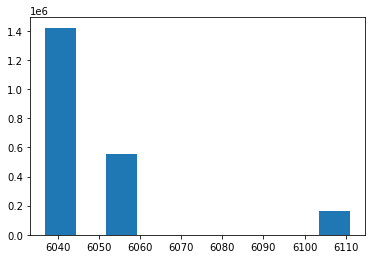

In [22]:
plt.hist(df.fips)

In [23]:
print('6037	Los Angeles,CA')
print('6059	Orang,CA')
print('6111	Ventura,CA')
df.fips.value_counts()

6037	Los Angeles,CA
6059	Orang,CA
6111	Ventura,CA


6037    1421092
6059     551713
6111     162103
Name: fips, dtype: int64

In [25]:
df.fips.count()

2134908

In [ ]:
## z_score < 3.5 take out.